#  1.从LR到决策树

        LR模型是利用线性回归的预测值，通过sigmoid映射为概率，来对数据做预测，有非常友好的数据预处理特性，工业界应用很丰富。
        决策树是（decision tree model）是一个模拟人类决策过程思想的模型。
        
# 2.分类树

        决策树学习的算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割，使得各个子数据集有一个最好的分类的过程。这一过程对应着对特征空间的划分，也对应着决策树的构建。
       1.开始：构建根节点，将所有训练数据都放在根节点，选择一个最优特征，按着这一特征将训练数据集分割成子集，使得各个子集有一个在当前条件下最好的分类。
       
       2.如果这些子集已经能够被基本正确分类，那么构建叶节点，并将这些子集分到所对应的叶节点去。
       
       3.如果还有子集不能够被正确的分类，那么就对这些子集选择新的最优特征，继续对其进行分割，构建相应的节点，如果递归进行，直至所有训练数据子集被基本正确的分类，或者没有合适的特征为止。
       
       4.每个子集都被分到叶节点上，即都有了明确的类，这样就生成了一颗决策树。
       
## 2.1决策树的关键因素

        决策树的构造方式：基于树的结构进行决策
        
        + 内部节点：对应对属性的测试
        
        + 分支：对应属性可能的结果
        
        + 叶节点：对应一个预测结果
        
        *****
   **决策树的学习过程（训练）**：通过对训练样本的分析，来确定划分的属性。
   
   **决策树的预测过程**： 将示例从根节点开始，沿着划分属性进行划分，直到叶节点
   
   **决策树通常有三个步骤**：特征选择、决策树的生成、决策树的修剪。
   
   **决策树学习的目标**：根据给定的训练数据集构建一个决策树模型，使它能够对实例进行正确的分类。
   
   **决策树学习的本质**：从训练集中归纳出一组分类规则，或者说是***由训练数据集估计条件概率模型***。
   
   **决策树学习的损失函数**：正则化的极大似然函数
   
   **决策树学习的测试**：最小化损失函数
   
   **决策树学习的目标**：在损失函数的意义下，选择最优决策树的问题。
   
   ***决策树算法的核心：从属性集中选择最优的划分属性***
   
  ***决策树的特点**：
  
    -优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
    
    -缺点：可能会产生过度匹配的问题
    
    -适用数据类型：数值型和标称型
    
    首先：确定当前数据集上的决定性特征，为了得到该决定性特征，必须评估每个特征，完成测试之后，原始数据集就被划分为几个数据子集，这些数据子集会分布在第一个决策点的所有分支上，如果某个分支下的数据属于同一类型，则当前无序阅读的垃圾邮件已经正确的划分数据分类，无需进一步对数据集进行分割，如果不属于同一类，则要重复划分数据子集，直到所有相同类型的数据均在一个数据子集内。
   
## 2.2如何选择最优的划分属性

### 2.2.1熵

        熵是度量样本不纯度的指标，样本不纯度越大，熵越大，越无序。
        
        熵是对平均不决定性的度量。
        
        熵是度量信息的期望。概率越大，信息越小。


***信息的公式为：***
$$l(x_i)=-log_2p(x_i)$$
***熵：***
$$H=-\sum_{i=1}^{n}p(x_i)log_2p(x_i)$$
***熵的公式***
$$Ent(D)=-\sum_{k=1}^{|y|}p_klog_2p_k$$

熵越小，样本的纯度越高，所以决策树的生长过程也是不断的将数据的不纯度降低的过程，希望最后得到的分类结果纯的很高，也就是准确性很高。

### 2.2.2 信息增益：ID3

机器学习的过程是希望将样本的不纯度往下降的过程，那么最优属性的划分可以参考那个属性对当前样本的熵降低的最多。

离散属性a的取值是${a^1,a^2,..,a^V}$,
$D^V$:$D$中在a上取值=$a^1,a^2,...a^v$的样本集合
以属性$a$对数据集$D$进行划分所获得的信息增益为：

$$Gain(D,a)=Ent(D)-\sum_{v=1}^{V}{\frac{|D|}{|D^v|}Ent(D^v)}$$

其中：$Ent(D)$是划分前的信息熵，后部分是划分后的信息熵。
$\frac{|D|}{|D^v|}$表示第$v$个分支的权重，样本越多越重要。

**信息增益实例;**
    该数据集包括17个训练样本，结果有2个类别，$|y|=2$,其中正例占$p_1=\frac{8}{17}$,反例占$p_2=\frac{9}{17}$,根节点的信息熵为：$$Ent(D)=-\sum_{k=1}^{2}p_klog_2p_k=-(\frac{8}{17}log_2{\frac{8}{17}}+{\frac{9}{17}}log_2{\frac{9}{17}})$$
    以属性“色泽”为例，对应的3个属性子集是$D^1$,$D^2$,$D^3$.
    其中，$D^1$有六个样本，正例占$p_1={\frac{3}{6}}$,反例占$p_2={\frac{3}{6}}$,$D^2$,$D^3$同理，3个节点的信息熵为：$$Ent(D^1)=-({\frac{3}{6}log_2{\frac{3}{6}}}{\frac{3}{6}log_2{\frac{3}{6}}})=1.00$$
    同理可得：
    $$Ent(D^2)=0.918$$
    $$Ent(D^3)=0.722$$
    
    $$Gain(D,色泽)=Ent(D)-{\sum_{v=1}^{3}\frac{|D^v|}{|D|}Ent(D^v)}$$
    
        

属性色泽的信息增益为;
$$Gain(D,色泽)=Ent(D)-{\sum_{v=1}^{3}\frac{|D^v|}{|D|}Ent(D^v)}=0.109$$
同样的方法判断其他属性的信息增益，比较大的作为当前的划分属性。

### 2.2.3 信息增益率（C4.5）
     信息增益存在的问题（对可取值数目较多的属性有所偏好）：假如我们用“学号”作为特征，也就是每个人一个学号，将45个人分到45个桶里，此时的纯度最高，但是对新来的特征没有任何意义，即分叉越多，越肯定，纯度越高，所带来的增益很大，所以我们选用相对值来衡量信息的增益，也就是信息增益率。
     信息增益率：
    


$$Gain_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$$

 其中:
$$IV(a)=-\sum_{v=1}^{V}{\frac{|D^v|}{|D|}}log_2{\frac{|D^v|}{|D|}}$$
某属性分的种类越多，$IV(a)$的值通常越大；
分叉越多，熵越大，所以不能只看增益，还要参考该属性自身的熵值。


### 2.2.4CART树(二叉树)

CART 与 ID3，C4.5 不同之处在于 CART 生成的树必须是二叉树。也就是说，无论是回归还是分类问题，无论特征是离散的还是连续的，无论属性取值有多个还是两个，内部节点只能根据属性值进行二分。
        
1.CART 的全称是 分类树与回归树。从这个名字中就应该知道，CART 既可以用于分类问题，也可以用于回归问题。
        
回归树中，使用平方误差最小化准则来选择特征并进行划分。每一个叶子节点给出的预测值，是划分到该叶子节点的所有样本目标值的均值，这样只是在给定划分的情况下最小化了平方误差。
        
要确定最优化分，还需要遍历所有属性，以及其所有的取值来分别尝试划分并计算在此种划分情况下的最小平方误差，选取最小的作为此次划分的依据。由于回归树生成使用平方误差最小化准则，所以又叫做最小二乘回归树。
        
2.分类树，使用**Gini 指数**最小化准则来选择特征并进行划分；
        
Gini 指数表示集合的不确定性，或者是不纯度。基尼指数越大，集合不确定性越高，不纯度也越大。这一点和熵类似。另一种理解基尼指数的思路是，基尼指数是为了最小化误分类的概率。

***Gini 指数 vs 熵***
        
    既然这两个都可以表示数据的不确定性，不纯度。那么这两个有什么区别那？
    
-Gini 指数的计算不需要对数运算，更加高效；

-Gini 指数更偏向于连续属性，熵更偏向于离散属性。


基尼指数（gini index）:Cart中使用：
    $$Gini(D)={\sum_{k=1}^{|y|}}{\sum_{k^`！=k}}p_kp_{k^`}$$
    $$=1-{\sum_{k=1}^{|y|}{p_k}^2}$$
    
**反应了从D中随机抽取两个样本，其类别标签不一致的概率**

Gini(D)越小，数据集D的纯度越高。

属性a 的基尼指数：

$$Gini_iindex(D,a)=\sum_{v=1}^{V}{\frac{|D_v|}{|D|}}Gini(D^v)$$

属性a按照一定规则划分成v个样本集，求各个样本集的基尼指数，按照比例进行求和，在候选属性集合中，选取那个是划分基尼指数最小的属性。

![title](images/001.png)

### 2.3 三种决策树的比较

1.ID3:

    取值多的属性，更容易 使数据更纯，其信息增益更大，训练得到的是一颗庞大且深度 浅的树，不合理；
    
    熵表示的是数据中包含的信息量大小。熵越小，数据的纯度越高，也就是说数据越趋于一致，这是我们希望的划分之后每个子节点的样子。
     信息增益 = 划分前熵 - 划分后熵。信息增益越大，则意味着使用属性 a 来进行划分所获得的 “纯度提升” 越大 **。也就是说，用属性 a 来划分训练集，得到的结果中纯度比较高。

      ID3 仅仅适用于二分类问题。ID3 仅仅能够处理离散属性。
    
2.C4.5：
      
      采用信息增益率代替信息增益。
      
      C4.5 克服了 ID3 仅仅能够处理离散属性的问题，以及信息增益偏向选择取值较多特征的问题，使用信息增益比来选择特征。信息增益比 = 信息增益 / 划分前熵 选择信息增益比最大的作为最优特征。
      
      C4.5 处理连续特征是先将特征取值排序，以连续两个值中间值作为划分标准。尝试每一种划分，并计算修正后的信息增益，选择信息增益最大的分裂点作为该属性的分裂点。但是，对连续属性值需要扫描排序，会使C4.5性能下降。

    ID3和C4.5都是分类树，CART（Classification and regression tree）可以是分类/回归树。
     
3.CRAT

    基尼指数代替熵，最小化不纯度，不是最大化信息增益。
    
    CART 与 ID3，C4.5 不同之处在于 CART 生成的树必须是二叉树。也就是说，无论是回归还是分类问题，无论特征是离散的还是连续的，无论属性取值有多个还是两个，内部节点只能根据属性值进行二分。

**这三个是非常著名的决策树算法。简单粗暴来说，ID3 使用信息增益作为选择特征的准则；C4.5 使用信息增益比作为选择特征的准则；CART 使用 Gini 指数作为选择特征的准则。**


     

## 2.4构建决策树

**使用决策树做预测需要以下过程：**

1.收集数据：可以使用任何方法。比如想构建一个相亲系统，我们可以从媒婆那里，或者通过参访相亲对象获取数据。根据他们考虑的因素和最终的选择结果，就可以得到一些供我们利用的数据了。

2.准备数据：收集完的数据，我们要进行整理，将这些所有收集的信息按照一定规则整理出来，并排版，方便我们进行后续处理。

3.分析数据：可以使用任何方法，决策树构造完成之后，我们可以检查决策树图形是否符合预期。

4.训练算法：这个过程也就是构造决策树，同样也可以说是决策树学习，就是构造一个决策树的数据结构。

5.测试算法：使用经验树计算错误率。当错误率达到了可接收范围，这个决策树就可以投放使用了。

6.使用算法：此步骤可以使用适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

### 2.4.1决策树的生成和修剪

我们已经学习了从数据集构造决策树算法所需要的子功能模块，包括经验熵的计算和最优特征的选择，其工作原理如下：得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分之后，数据集被向下传递到树的分支的下一个结点。在这个结点上，我们可以再次划分数据。因此我们可以采用递归的原则处理数据集。  

构建决策树的算法有很多，比如C4.5、ID3和CART，这些算法在运行时并不总是在每次划分数据分组时都会消耗特征。由于特征数目并不是每次划分数据分组时都减少，因此这些算法在实际使用时可能引起一定的问题。目前我们并不需要考虑这个问题，只需要在算法开始运行前计算列的数目，查看算法是否使用了所有属性即可。

决策树生成算法递归地产生决策树，直到不能继续下去未为止。这样产生的树往往对训练数据的分类很准确，但对未知的测试数据的分类却没有那么准确，即出现过拟合现象。过拟合的原因在于学习时过多地考虑如何提高对训练数据的正确分类，从而构建出过于复杂的决策树。解决这个问题的办法是考虑决策树的复杂度，对已生成的决策树进行简化。

**递归构建决策树**

从数据集构造决策树算法所需的子功能模块工作原理如下：得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分，第一次划分之后，数据将被向下传递到树分支的下一个节点，在此节点在此划分数据，因此可以使用递归的原则处理数据集。

**递归结束的条件是:**

程序完全遍历所有划分数据集的属性，或者每个分支下的所有实例都具有相同的分类，如果所有实例具有相同的分类，则得到一个叶子节点或者终止块，任何到达叶子节点的数据必然属于叶子节点的分类。
###  2.4.2 决策树的剪枝

    决策树生成算法递归的产生决策树，直到不能继续下去为止，这样产生的树往往对训练数据的分类很准确，但对未知测试数据的分类缺没有那么精确，即会出现过拟合现象。过拟合产生的原因在于在学习时过多的考虑如何提高对训练数据的正确分类，从而构建出过于复杂的决策树，解决方法是考虑决策树的复杂度，对已经生成的树进行简化。
    
    剪枝（pruning）：从已经生成的树上裁掉一些子树或叶节点，并将其根节点或父节点作为新的叶子节点，从而简化分类树模型。
    
**实现方法：**
        极小化决策树整体的损失函数或代价函数来实现
        
决策树学习的损失函数定义为：

$$C_{\alpha}(T)=\sum_{t=1}^{|T|}N_tH_t(T)+{\alpha}{|T|}$$

其中：

1.T  表示这棵树的叶子节点

2.$H_t(T)$     $$H_t(T)=-{\sum_{k=1}^{n}{\frac{N_tk}{N_t}}log{\frac{N_tk}{N_t}}}$$

       表示t个叶子的熵。
       n表示叶上的样本个数.
       
3.$N_t$表示该叶子所含的训练样例的个数.

4.{\alpha}表示惩罚系数

5.$|T|$表示子树的叶子节点的个数.

其中：

$$C(T)=\sum_{t=1}^{|T|}N_tH_t(T)$$

所以有：
$$C_{\alpha}(T)=C(T)+{\alpha}|T|$$

意义：

1.$C(T)$  表示模型对训练数据的预测误差，即模型与训练数据的拟合程度。

2.$|T|$   表示模型复杂度

3.${\alpha}$  参数${\alpha}$控制两者之间的误差，较大的${\alpha}$促使选择简单的模型，较小的${\alpha}$促使选择较复杂的模型，${\alpha}=0$意味着只考虑模型和训练数据的拟合程度，不考虑模型的复杂度。

损失函数认为对于每个分类终点（叶子节点）的不确定性程度就是分类的损失因子，而叶子节点的个数是模型的复杂程度，作为惩罚项，损失函数的第一项是样本的训练误差，第二项是模型的复杂度。如果一棵子树的损失函数值越大，说明这棵子树越差，因此我们希望让每一棵子树的损失函数值尽可能得小，损失函数最小化就是用正则化的极大似然估计进行模型选择的过程。

决策树的剪枝过程（泛化过程）就是从叶子节点开始递归，记其父节点将所有子节点回缩后的子树为$T_b$(分类值取类别比例最大的特征值)，未回缩的子树为$T_a$, 如果$C_{\alpha}(T_a)>=C_{\alpha}(T_b)$说明回缩后使得损失函数减少了，那么应该使这棵树回缩，递归直到无法回缩为止，这样使用贪心的思想进行剪枝，可以降低损失函数值，也使决策树得到泛化。

决策树的生成只是考虑通过提高信息增益对训练数据进行更好的拟合，而决策树剪枝通过优化损失函数还考虑了减小模型复杂度。

![title](images/002png.png)

**树的剪枝算法：**
    输入：生成算法产生的整个树T，参数${\alpha}$
    输出：修剪后的子树${T_a}$
    
    (1)计算每个节点的经验熵
    
    (2)递归的从树的叶节点向上回缩。
    
 ***总计***
 ![总计](images/003.png)
    
    







### 2.4.3编写代码计算经验熵

在编写代码之前，我们先对数据集进行属性标注。

年龄：0代表青年，1代表中年，2代表老年；

有工作：0代表否，1代表是；

有自己的房子：0代表否，1代表是；

信贷情况：0代表一般，1代表好，2代表非常好；

类别(是否给贷款)：no代表否，yes代表是




In [7]:
#创建数据集，计算经验熵：
from math import log

def createDataSet():
    #数据集
    dataSet=[[0, 0, 0, 0, 'no'],
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]

    labels=['年龄','有工作','有自己的房子','信贷情况']
    
    return dataSet,labels

#函数说明：计算给定数据集的经验熵（香农熵）
def calcShannonEnt(dataSet):
    #返回数据集行数
    numEntries=len(dataSet)
    #保存每个标签（label）出现次数的字典
    labelCounts={}
    #对每组特征向量进行统计
    for featVec in dataSet:
        currentLabel=featVec[-1]                     #提取标签信息
        if currentLabel not in labelCounts.keys():   #如果标签没有放入统计次数的字典，添加进去
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1                 #label计数

    shannonEnt=0.0                                   #经验熵
    #计算经验熵
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries      #选择该标签的概率
        shannonEnt-=prob*log(prob,2)                 #利用公式计算
    return shannonEnt                                #返回经验熵
#main函数
"""
if __name__=="__main__":
    dataSet,features=createDataSet()
    print(calcShannonEnt(dataSet))
"""


0.9709505944546686


## 2.4.4 利用代码计算信息增益

In [11]:
from math import log 

def chooseBestFeatureToSplit(dataSet):
    #特征数量
    numFeatures = len(dataSet[0]) - 1
    #计数数据集的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #信息增益
    bestInfoGain = 0.0
    #最优特征的索引值
    bestFeature = -1
    #遍历所有特征
    for i in range(numFeatures):
        # 获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        #创建set集合{}，元素不可重复
        uniqueVals = set(featList)
        #经验条件熵
        newEntropy = 0.0
        #计算信息增益
        for value in uniqueVals:
            #subDataSet划分后的子集
            subDataSet = splitDataSet(dataSet, i, value)
            #计算子集的概率
            prob = len(subDataSet) / float(len(dataSet))
            #根据公式计算经验条件熵
            newEntropy += prob * calcShannonEnt((subDataSet))
        #信息增益
        infoGain = baseEntropy - newEntropy
        #打印每个特征的信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        #计算信息增益
        if (infoGain > bestInfoGain):
            #更新信息增益，找到最大的信息增益
            bestInfoGain = infoGain
            #记录信息增益最大的特征的索引值
            bestFeature = i
            #返回信息增益最大特征的索引值
    return bestFeature

"""
函数说明：按照给定特征划分数据集
Parameters：
    dataSet：待划分的数据集
    axis：划分数据集的特征
    value：需要返回的特征的值
Returns：
    shannonEnt：经验熵

"""
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet
"""
if __name__=="__main__":
    dataSet,features=createDataSet()
    print("最优索引值："+str(chooseBestFeatureToSplit(dataSet)))

"""


第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
最优索引值：2


第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


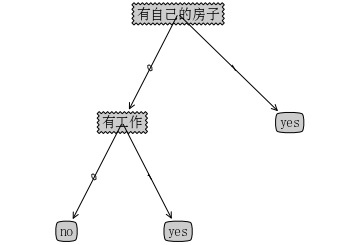

放贷


In [16]:
#编写ID3 算法的代码
from math import log
import operator
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
"""
函数说明：计算给定数据集的经验熵（香农熵）
Parameters：
    dataSet：数据集
Returns：
    shannonEnt：经验熵
Modify：
    2018-03-12

"""
def calcShannonEnt(dataSet):
    #返回数据集行数
    numEntries=len(dataSet)
    #保存每个标签（label）出现次数的字典
    labelCounts={}
    #对每组特征向量进行统计
    for featVec in dataSet:
        currentLabel=featVec[-1]                     #提取标签信息
        if currentLabel not in labelCounts.keys():   #如果标签没有放入统计次数的字典，添加进去
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1                 #label计数

    shannonEnt=0.0                                   #经验熵
    #计算经验熵
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries      #选择该标签的概率
        shannonEnt-=prob*log(prob,2)                 #利用公式计算
    return shannonEnt                                #返回经验熵

"""
函数说明：创建测试数据集
Parameters：无
Returns：
    dataSet：数据集
    labels：分类属性
Modify：
    2018-03-13

"""
def createDataSet():
    # 数据集
    dataSet=[[0, 0, 0, 0, 'no'],
            [0, 0, 0, 1, 'no'],
            [0, 1, 0, 1, 'yes'],
            [0, 1, 1, 0, 'yes'],
            [0, 0, 0, 0, 'no'],
            [1, 0, 0, 0, 'no'],
            [1, 0, 0, 1, 'no'],
            [1, 1, 1, 1, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [1, 0, 1, 2, 'yes'],
            [2, 0, 1, 2, 'yes'],
            [2, 0, 1, 1, 'yes'],
            [2, 1, 0, 1, 'yes'],
            [2, 1, 0, 2, 'yes'],
            [2, 0, 0, 0, 'no']]
    #分类属性
    labels=['年龄','有工作','有自己的房子','信贷情况']
    #返回数据集和分类属性
    return dataSet,labels

"""
函数说明：按照给定特征划分数据集

Parameters：
    dataSet:待划分的数据集
    axis：划分数据集的特征
    value：需要返回的特征值
Returns：
    无
Modify：
    2018-03-13

"""
def splitDataSet(dataSet,axis,value):
    #创建返回的数据集列表
    retDataSet=[]
    #遍历数据集
    for featVec in dataSet:
        if featVec[axis]==value:
            #去掉axis特征
            reduceFeatVec=featVec[:axis]
            #将符合条件的添加到返回的数据集
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    #返回划分后的数据集
    return retDataSet

"""
函数说明：计算给定数据集的经验熵（香农熵）
Parameters：
    dataSet：数据集
Returns：
    shannonEnt：信息增益最大特征的索引值
Modify：
    2018-03-13

"""


def chooseBestFeatureToSplit(dataSet):
    #特征数量
    numFeatures = len(dataSet[0]) - 1
    #计数数据集的香农熵
    baseEntropy = calcShannonEnt(dataSet)
    #信息增益
    bestInfoGain = 0.0
    #最优特征的索引值
    bestFeature = -1
    #遍历所有特征
    for i in range(numFeatures):
        # 获取dataSet的第i个所有特征
        featList = [example[i] for example in dataSet]
        #创建set集合{}，元素不可重复
        uniqueVals = set(featList)
        #经验条件熵
        newEntropy = 0.0
        #计算信息增益
        for value in uniqueVals:
            #subDataSet划分后的子集
            subDataSet = splitDataSet(dataSet, i, value)
            #计算子集的概率
            prob = len(subDataSet) / float(len(dataSet))
            #根据公式计算经验条件熵
            newEntropy += prob * calcShannonEnt((subDataSet))
        #信息增益
        infoGain = baseEntropy - newEntropy
        #打印每个特征的信息增益
        print("第%d个特征的增益为%.3f" % (i, infoGain))
        #计算信息增益
        if (infoGain > bestInfoGain):
            #更新信息增益，找到最大的信息增益
            bestInfoGain = infoGain
            #记录信息增益最大的特征的索引值
            bestFeature = i
            #返回信息增益最大特征的索引值
    return bestFeature

"""
函数说明：统计classList中出现次数最多的元素（类标签）
Parameters：
    classList：类标签列表
Returns：
    sortedClassCount[0][0]：出现次数最多的元素（类标签）
Modify：
    2018-03-13

"""
def majorityCnt(classList):
    classCount={}
    #统计classList中每个元素出现的次数
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
            classCount[vote]+=1
        #根据字典的值降序排列
        sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
        return sortedClassCount[0][0]

"""
函数说明：创建决策树

Parameters:
    dataSet：训练数据集
    labels：分类属性标签
    featLabels：存储选择的最优特征标签
Returns：
    myTree：决策树
Modify：
    2018-03-13

"""
def createTree(dataSet,labels,featLabels):
    #取分类标签（是否放贷：yes or no）
    classList=[example[-1] for example in dataSet]
    #如果类别完全相同，则停止继续划分
    if classList.count(classList[0])==len(classList):
        return classList[0]
    #遍历完所有特征时返回出现次数最多的类标签
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    #选择最优特征
    bestFeat=chooseBestFeatureToSplit(dataSet)
    #最优特征的标签
    bestFeatLabel=labels[bestFeat]
    featLabels.append(bestFeatLabel)
    #根据最优特征的标签生成树
    myTree={bestFeatLabel:{}}
    #删除已经使用的特征标签
    del(labels[bestFeat])
    #得到训练集中所有最优特征的属性值
    featValues=[example[bestFeat] for example in dataSet]
    #去掉重复的属性值
    uniqueVls=set(featValues)
    #遍历特征，创建决策树
    for value in uniqueVls:
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),
                                               labels,featLabels)
    return myTree

"""
函数说明：获取决策树叶子节点的数目

Parameters：
    myTree：决策树
Returns：
    numLeafs：决策树的叶子节点的数目
Modify：
    2018-03-13

"""

def getNumLeafs(myTree):
    numLeafs=0
    firstStr=next(iter(myTree))
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else: numLeafs+=1
    return numLeafs

"""
函数说明:获取决策树的层数

Parameters:
    myTree:决策树
Returns:
    maxDepth:决策树的层数

Modify:
    2018-03-13
"""
def getTreeDepth(myTree):
    maxDepth = 0                                                #初始化决策树深度
    firstStr = next(iter(myTree))                                #python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]                                #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth            #更新层数
    return maxDepth

"""
函数说明:绘制结点

Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
Returns:
    无
Modify:
    2018-03-13
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                            #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',    #绘制结点
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)

"""
函数说明:标注有向边属性值

Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
Returns:
    无
Modify:
    2018-03-13
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                                            #计算标注位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

"""
函数说明:绘制决策树

Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
Returns:
    无
Modify:
    2018-03-13
"""
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                        #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                            #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                          #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                            #获取决策树层数
    firstStr = next(iter(myTree))                                                            #下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                    #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                        #绘制结点
    secondDict = myTree[firstStr]                                                            #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                        #y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                                            #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))                                        #不是叶结点，递归调用继续绘制
        else:                                                                                #如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

"""
函数说明:创建绘制面板

Parameters:
    inTree - 决策树(字典)
Returns:
    无
Modify:
    2018-03-13
"""
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')#创建fig
    fig.clf()#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0#x偏移
    plotTree(inTree, (0.5,1.0), '')#绘制决策树
    plt.show()#显示绘制结果
    
"""
使用决策树进行分类
Parameters：
    inputTree；已经生成的决策树
    featLabels：存储选择的最优特征标签
    testVec：测试数据列表，顺序对应最优特征标签
Returns：
    classLabel：分类结果
Modify：2018-03-13

"""
def classify(inputTree,featLabels,testVec):
    #获取决策树节点
    firstStr=next(iter(inputTree))
    #下一个字典
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)

    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classLabel=classify(secondDict[key],featLabels,testVec)
            else: classLabel=secondDict[key]
    return classLabel


if __name__=='__main__':
    dataSet,labels=createDataSet()
    featLabels=[]
    myTree=createTree(dataSet,labels,featLabels)
    print(myTree)
    createPlot(myTree)
    testVec=[0,1]
    result=classify(myTree,featLabels,testVec)

    if result=='yes':
        print('放贷')
    if result=='no':
        print('不放贷')



### 2.4.5使用决策树进行分类

  依靠训练数据构造了决策树之后，我们可以将它用于实际数据的分类。在执行数据分类时，需要决策树以及用于构造树的标签向量。然后，程序比较测试数据与决策树上的数值，递归执行该过程直到进入叶子结点；最后将测试数据定义为叶子结点所属的类型。在构建决策树的代码，可以看到，有个featLabels参数。它是用来干什么的？它就是用来记录各个分类结点的，在用决策树做预测的时候，我们按顺序输入需要的分类结点的属性值即可。举个例子，比如我用上述已经训练好的决策树做分类，那么我只需要提供这个人是否有房子，是否有工作这两个信息即可，无需提供冗余的信息。

### 2.4.6决策树的存储

    构造决策树是很耗时的任务，即使处理很小的数据集，如前面的样本数据，也要花费几秒的时间，如果数据集很大，将会耗费很多计算时间。然而用创建好的决策树解决分类问题，则可以很快完成。因此，为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树。为了解决这个问题，需要使用Python模块pickle序列化对象。序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。
    


In [17]:
import pickle
"""
函数说明：存储决策树
Parameters：
    inputTree：已经生成的决策树
    filename：决策树的存储文件名
Returns：
    无
Modify：
    2018-03-13

"""
def storeTree(inputTree,filename):
    with open(filename,'wb') as fw:
        pickle.dump(inputTree,fw)

if __name__=='__main__':
    myTree={'有自己的房子':{0:{'有工作':{0:'no',1:'yes'}},1:'yes'}}
    storeTree(myTree,'classifierStorage.txt')


In [18]:
# -*- coding: UTF-8 -*-
import pickle

"""
函数说明:读取决策树

Parameters:
    filename：决策树的存储文件名
Returns:
    pickle.load(fr)：决策树字典
Modify:
    2018-03-13
"""
def grabTree(filename):
    fr = open(filename, 'rb')
    return pickle.load(fr)

if __name__ == '__main__':
    myTree = grabTree('classifierStorage.txt')
    print(myTree)

{'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}


### 2.4.7  sklearn——使用决策树预测隐形眼镜类型

https://github.com/Jack-Cherish/Machine-Learning/tree/master/Decision%20Tree   参考链接数据集下载

步骤：

收集数据：使用书中提供的小型数据集

准备数据：对文本中的数据进行预处理，如解析数据行

分析数据：快速检查数据，并使用createPlot()函数绘制最终的树形图

训练决策树：使用createTree()函数训练

测试决策树：编写简单的测试函数验证决策树的输出结果&绘图结果

使用决策树：这部分可选择将训练好的决策树进行存储，以便随时使用

***使用sklearn构建决策树***

sklearn.tree——提供了决策树模型，用于解决分类和回归问题   

官方链接：http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

参数说明如下：

**1.criterion：**特征选择标准，可选参数，默认是gini，可以设置为entropy。gini是基尼不纯度，是将来自集合的某种结果随机应用于某一数据项的预期误差率，是一种基于统计的思想。entropy是香农熵，也就是上篇文章讲过的内容，是一种基于信息论的思想。Sklearn把gini设为默认参数，应该也是做了相应的斟酌的，精度也许更高些？ID3算法使用的是entropy，CART算法使用的则是gini。

**2.splitter：**特征划分点选择标准，可选参数，默认是best，可以设置为random。每个结点的选择策略。best参数是根据算法选择最佳的切分特征，例如gini、entropy。random随机的在部分划分点中找局部最优的划分点。默认的”best”适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐”random”。

**3.max_features：**划分时考虑的最大特征数，可选参数，默认是None。寻找最佳切分时考虑的最大特征数(n_features为总共的特征数)，有如下6种情况：

    如果max_features是整型的数，则考虑max_features个特征； 

    如果max_features是浮点型的数，则考虑int(max_features * n_features)个特征；

    如果max_features设为auto，那么max_features = sqrt(n_features)；

    如果max_features设为sqrt，那么max_featrues = sqrt(n_features)，跟auto一样；

    如果max_features设为log2，那么max_features = log2(n_features)；

    如果max_features设为None，那么max_features = n_features，也就是所有特征都用。 

    一般来说，如果样本特征数不多，比如小于50，我们用默认的”None”就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。
    
**4.max_depth：**决策树最大深，可选参数，默认是None。这个参数是这是树的层数的。层数的概念就是，比如在贷款的例子中，决策树的层数是2层。如果这个参数设置为None，那么决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。或者如果设置了**min_samples_slipt参数**，那么直到少于min_smaples_split个样本为止。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

**5.min_samples_split**：内部节点再划分所需最小样本数，可选参数，默认是2。这个值限制了子树继续划分的条件。如果min_samples_split为整数，那么在切分内部结点的时候，min_samples_split作为最小的样本数，也就是说，如果样本已经少于min_samples_split个样本，则停止继续切分。如果min_samples_split为浮点数，那么min_samples_split就是一个百分比，ceil(min_samples_split * n_samples)，数是向上取整的。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。 

**6.min_weight_fraction_leaf**叶子节点最小的样本权重和，可选参数，默认是0。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

**7.max_leaf_nodes：**最大叶子节点数，可选参数，默认是None。通过限制最大叶子节点数，可以防止过拟合。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

**8.class_weight：**类别权重，可选参数，默认是None，也可以字典、字典列表、balanced。指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。类别的权重可以通过{class_label：weight}这样的格式给出，这里可以自己指定各个样本的权重，或者用balanced，如果使用balanced，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的None。

**9.random_state：**可选参数，默认是None。随机数种子。如果是正数，那么random_state会作为随机数生成器的随机数种子。随机数种子，如果没有设置随机数，随机出来的数与当前系统时间有关，每个时刻都是不同的。如果设置了随机数种子，那么相同随机数种子，不同时刻产生的随机数也是相同的。如果是RandomState instance，那么random_state是随机数生成器。如果为None，则随机数生成器使用np.random。

**10.min_impurity_split**：节点划分最小不纯度,可选参数，默认是1e-7。这是个阈值，这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。

**11.presort：**数据是否预排序，可选参数，默认为False，这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。 

除了这些参数要注意以外，其他在调参时的注意点有：

当样本数量少但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型 

如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。 

推荐多用决策树的可视化，同时先限制决策树的深度，这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。 

在训练模型时，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。 

决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。 

***sklearn.tree.DecisionTreeClassifier()***提供了一些方法供我们使用，如下图所示：
![title](images/004.png)

**数据预处理**
将string类型的数据集进行编码：

(1)LabelEncoder：将字符串转换为增量值 

(2)OneHotEncoder：使用One-of-K算法将字符串转换为整数

为了对string类型的数据序列化，需要先生成pandas数据，这样方便我们的序列化工作。这里我使用的方法是，原始数据->字典->pandas数据，编写代码如下：


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

if __name__=="__main__":
  # 加载文件
    with open('lenses.txt', 'r') as fr:
        # 处理文件
        lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    # 提取每组数据的类别，保存在列表里
    lenses_target = []
    for each in lenses:
        lenses_target.append(each[-1])
    # 特征标签
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    # 保存lenses数据的临时列表
    lenses_list = []
    # 保存lenses数据的字典，用于生成pandas
    lenses_dict = {}
    # 提取信息，生成字典
    for each_label in lensesLabels:
        for each in lenses:
            lenses_list.append(each[lensesLabels.index(each_label)])
        lenses_dict[each_label] = lenses_list
        lenses_list = []
        # 打印字典信息
    print(lenses_dict)
    #生成pandas.DataFrame
    lenses_pd = pd.DataFrame(lenses_dict)
    # print(lenses_pd)
    # 生成pandas.DataFrame
    lenses_pd = pd.DataFrame(lenses_dict)
    # 打印pandas.DataFrame
    print(lenses_pd)
    # 创建LabelEncoder()对象，用于序列化
    le = LabelEncoder()
    # 为每一列序列化
    for col in lenses_pd.columns:
        lenses_pd[col] = le.fit_transform(lenses_pd[col])
    print(lenses_pd)

{'age': ['young', 'young', 'young', 'young', 'young', 'young', 'young', 'young', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'pre', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic', 'presbyopic'], 'prescript': ['myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper', 'myope', 'myope', 'myope', 'myope', 'hyper', 'hyper', 'hyper', 'hyper'], 'astigmatic': ['no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes'], 'tearRate': ['reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal']}
           age prescript astigmatic tearRate
0        young     myope         no 

**使用pydotplus可视化决策树**
安装——配置——运行

## 3.总结##

**1.优点**


    易于理解和解释，决策树可以可视化。
    
    几乎不需要数据预处理。其他方法经常需要数据标准化，创建虚拟变量和删除缺失值。决策树还不支持缺失值。
    
    使用树的花费（例如预测数据）是训练数据点(data points)数量的对数。

    可以同时处理数值变量和分类变量。其他方法大都适用于分析一种变量的集合。

    可以处理多值输出变量问题。

    使用白盒模型。如果一个情况被观察到，使用逻辑判断容易表示这种规则。相反，如果是黑盒模型（例如人工神经网络），结果会非常难解释。

    即使对真实模型来说，假设无效的情况下，也可以较好的适用。

**2.缺点**
    
    决策树学习可能创建一个过于复杂的树，并不能很好的预测数据。也就是过拟合。修剪机制（现在不支持），设置一个叶子节点需要的最小样本数量，或者数的最大深度，可以避免过拟合。
    
    决策树可能是不稳定的，因为即使非常小的变异，可能会产生一颗完全不同的树。这个问题通过decision trees with an ensemble来缓解。
    
    学习一颗最优的决策树是一个NP-完全问题under several aspects of optimality and even for simple concepts。因此，传统决策树算法基于启发式算法，例如贪婪算法，即每个节点创建最优决策。这些算法不能产生一个全家最优的决策树。对样本和特征随机抽样可以降低整体效果偏差。
    
    概念难以学习，因为决策树没有很好的解释他们，例如，XOR, parity or multiplexer problems.
    
    如果某些分类占优势，决策树将会创建一棵有偏差的树。因此，建议在训练之前，先抽样使样本均衡。
    